In [ ]:
pip install mlxtend scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.5 MB/s eta 0:00:00


In [ ]:
!gdown '1TgNCbHAsLkOR8A3vxVr70XBW5pBZv1tx'

Downloading...
From: https://drive.google.com/uc?id=1TgNCbHAsLkOR8A3vxVr70XBW5pBZv1tx
To: /content/clean_dataset.csv
100% 695k/695k [00:00<00:00, 91.5MB/s]


In [ ]:
import pandas as pd
import warnings
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):


In [ ]:
clean_data = pd.read_csv('clean_dataset.csv')
clean_data = clean_data.dropna()
clean_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating Count,Minimum Installs,Currency,Ad Supported,In app purchases,Editor Choice
0,0.0,0.612613,1.078849e-05,19.0,100000,1.0,0.0,1.0,0.0,8.000234e-06,0.000020,0.0,1.0,1.0,1.0
1,0.0,0.808348,1.015852e-03,124.0,10000000,1.0,0.0,1.0,0.0,6.693433e-04,0.002000,0.0,1.0,0.0,1.0
2,0.0,0.867990,1.345913e-04,39.0,1000000,1.0,0.0,0.0,0.0,1.197077e-04,0.000200,0.0,1.0,0.0,1.0
3,0.0,0.824000,9.873399e-07,30.0,10000,1.0,0.0,0.0,0.0,7.574612e-07,0.000002,0.0,1.0,1.0,1.0
4,0.0,0.816611,4.883720e-04,23.0,10000000,1.0,0.0,0.0,0.0,3.617202e-04,0.002000,0.0,1.0,1.0,1.0


# **Phase 2 - Part 1**

In [ ]:
def find_columns_with_two_unique_values(df):
    cols_with_two_unique = [col for col in df.columns if df[col].nunique() == 2 and col != 'Genres' and col != 'Category']
    return cols_with_two_unique

# Find columns with exactly 2 unique values
columns_with_two_unique_values = find_columns_with_two_unique_values(clean_data)

# Display the columns
print("Columns with exactly 2 unique values:")
print(columns_with_two_unique_values)

selected_data = clean_data[columns_with_two_unique_values]

Columns with exactly 2 unique values:
['Type', 'Content Rating', 'Currency', 'In app purchases', 'Editor Choice']


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Your initial parameters
min_support = 0.6
min_confidence = 0.8
desired_patterns_count = 12
support_step = 0.05

# Loop to find the minimum support that yields at least 12 frequent patterns
while True:
    frequent_itemsets = apriori(selected_data, min_support=min_support, use_colnames=True)
    if len(frequent_itemsets[frequent_itemsets['support'] > min_support]) >= desired_patterns_count:
        break
    min_support -= support_step

# Generate association rules with the found min_support
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

frequent_patterns = frequent_itemsets[frequent_itemsets['support'] > min_support].head(desired_patterns_count)
print("\nFrequent Patterns (at least 12):")
print(frequent_patterns)

print(f"\nFinal min_support used: {round(min_support, 2)}")


Frequent Itemsets:
     support                                           itemsets
0   0.938915                                             (Type)
1   0.854995                                   (Content Rating)
2   0.657469                                 (In app purchases)
3   0.969743                                    (Editor Choice)
4   0.803996                             (Content Rating, Type)
5   0.610276                           (In app purchases, Type)
6   0.909800                              (Editor Choice, Type)
7   0.594101                 (Content Rating, In app purchases)
8   0.837488                    (Content Rating, Editor Choice)
9   0.653473                  (Editor Choice, In app purchases)
10  0.552997           (Content Rating, In app purchases, Type)
11  0.786870              (Content Rating, Editor Choice, Type)
12  0.606851            (Editor Choice, In app purchases, Type)
13  0.591627  (Content Rating, Editor Choice, In app purchases)
14  0.550714  (Conten

In [ ]:
len(clean_data.columns)

16

# **Clustering with K-Means**

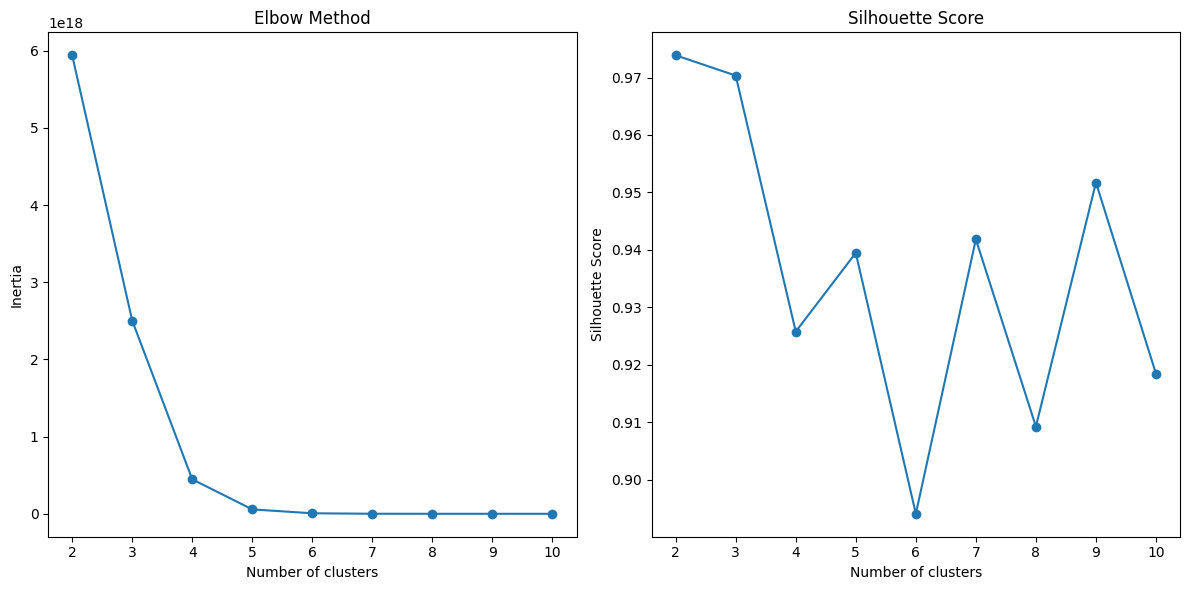

Optimal number of clusters: 2


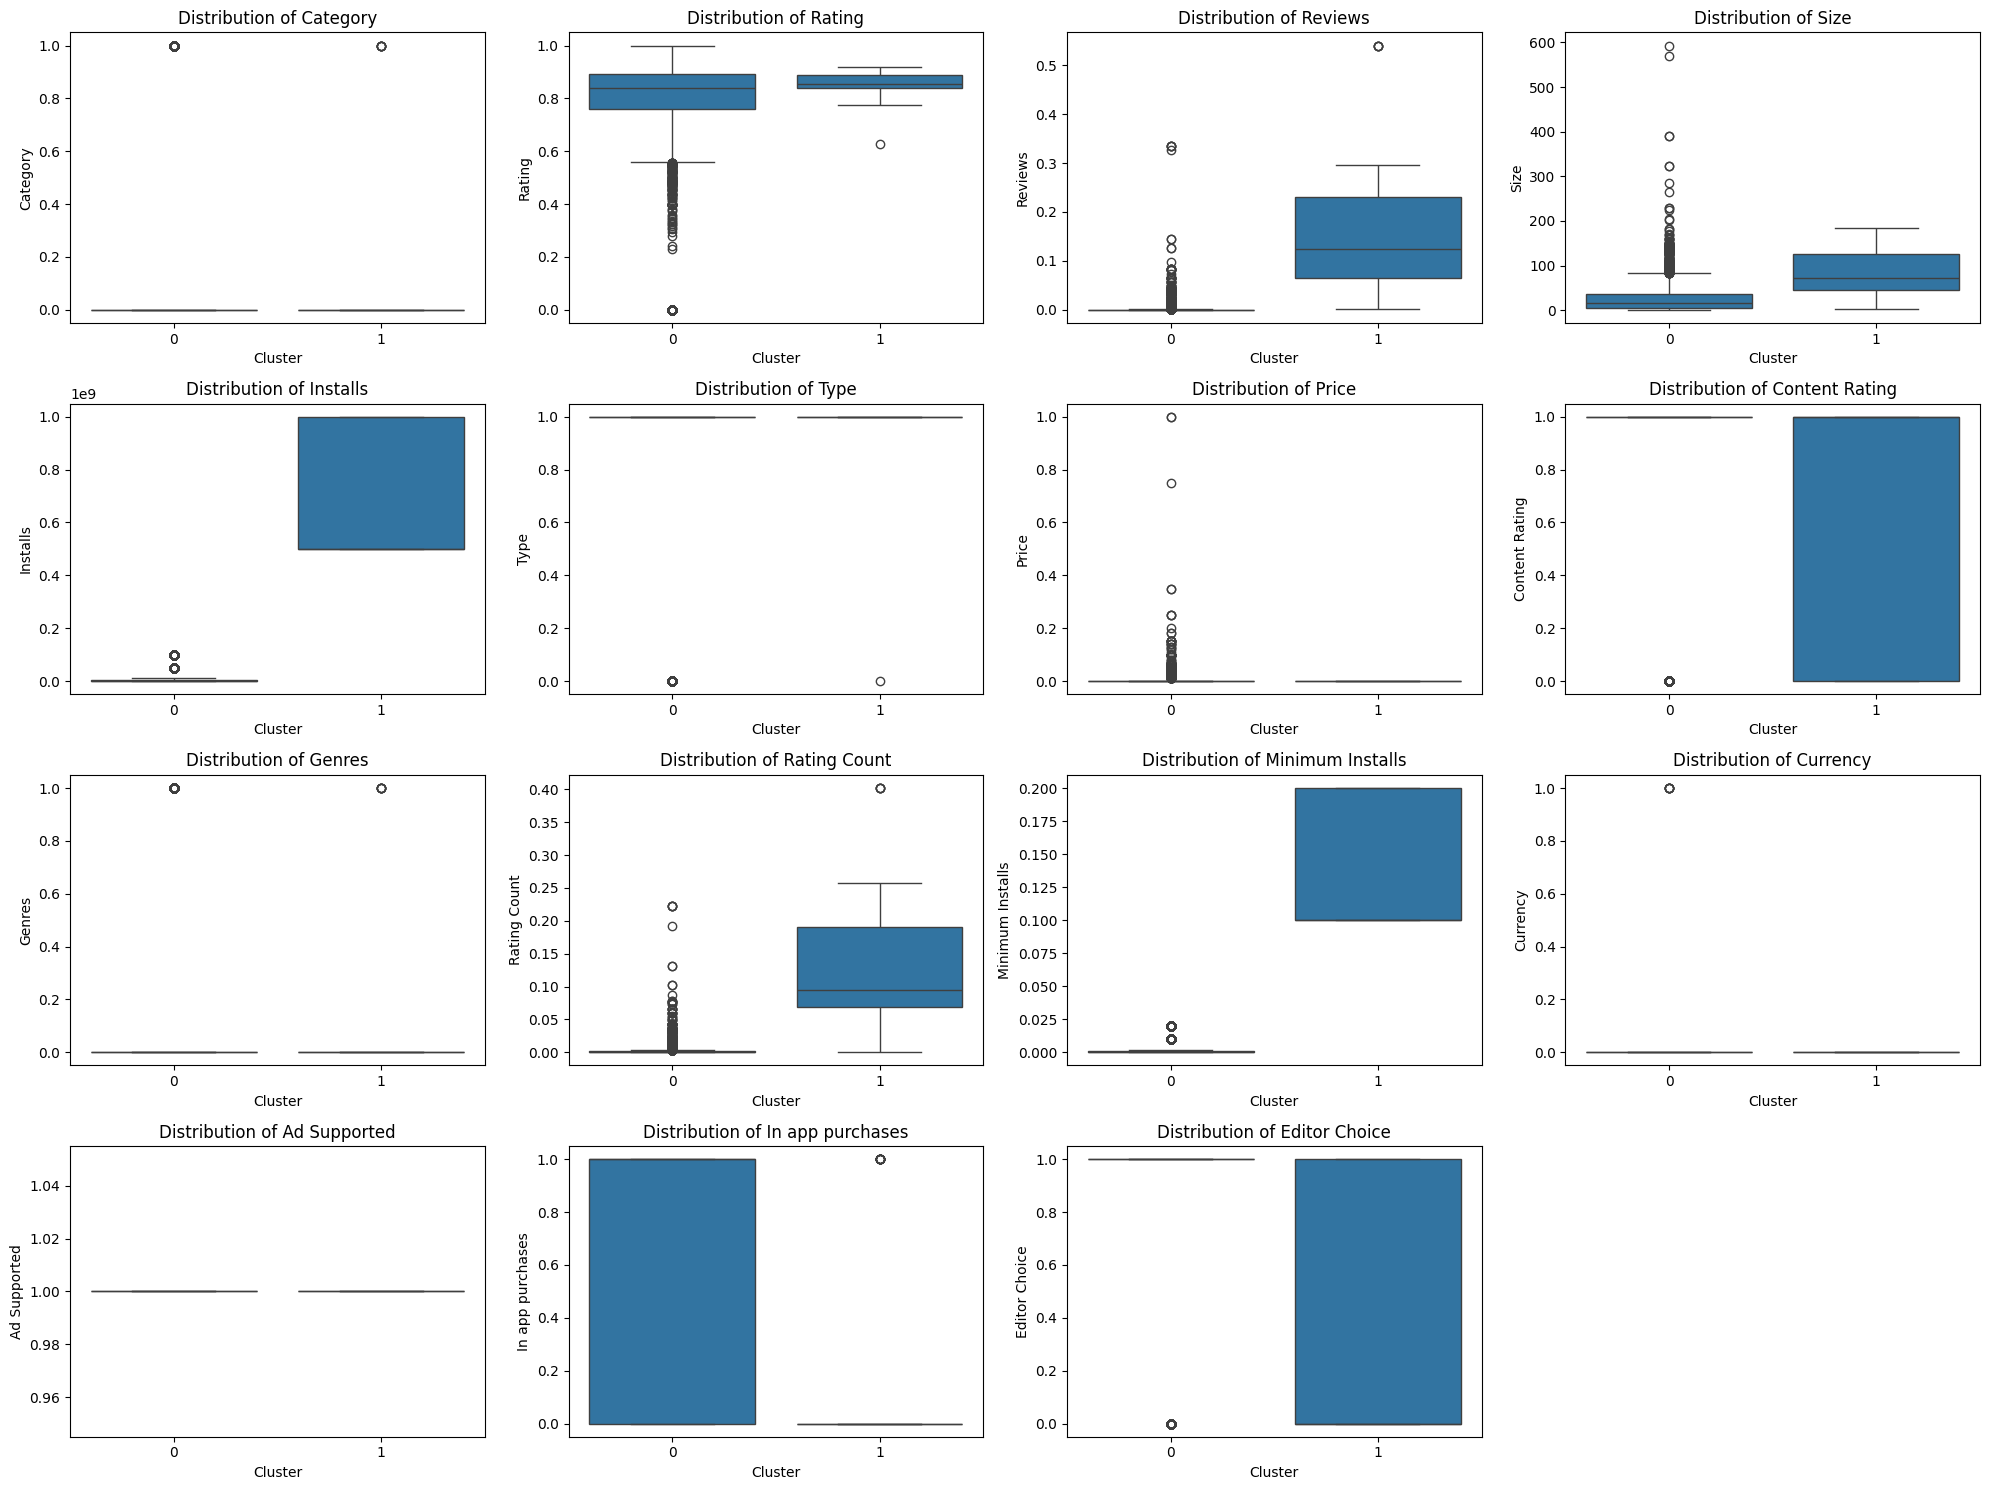

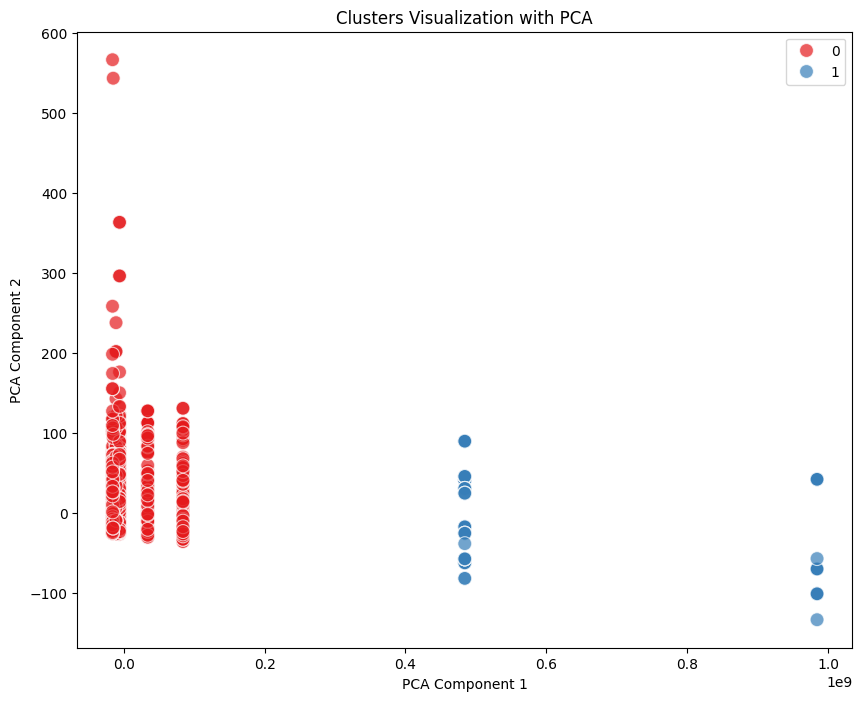

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Step 1: Determine the optimal number of clusters using the Elbow method and Silhouette score
def determine_optimal_clusters(data, max_k):
    inertia = []
    silhouette_scores = []

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot the Elbow method graph
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k+1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

    # Plot the Silhouette score graph
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

    return inertia, silhouette_scores

# Run the function to determine optimal clusters
inertia, silhouette_scores = determine_optimal_clusters(clean_data, 10)

# Step 2: Choose the optimal number of clusters (k) based on the Elbow method and Silhouette score
optimal_k = np.argmax(silhouette_scores) + 2
print(f'Optimal number of clusters: {optimal_k}')

# Step 3: Cluster the data using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clean_data['Cluster'] = kmeans.fit_predict(clean_data)

# Step 4: Analyze and visualize the results
# Plot the distribution of each column for each cluster
plt.figure(figsize=(20, 15))
for i, column in enumerate(clean_data.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='Cluster', y=column, data=clean_data)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Plot the clusters (if we can reduce to 2D or 3D using PCA for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clean_data.iloc[:, :-1])
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clean_data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Testing with optimal k from elbow method -> k = 4


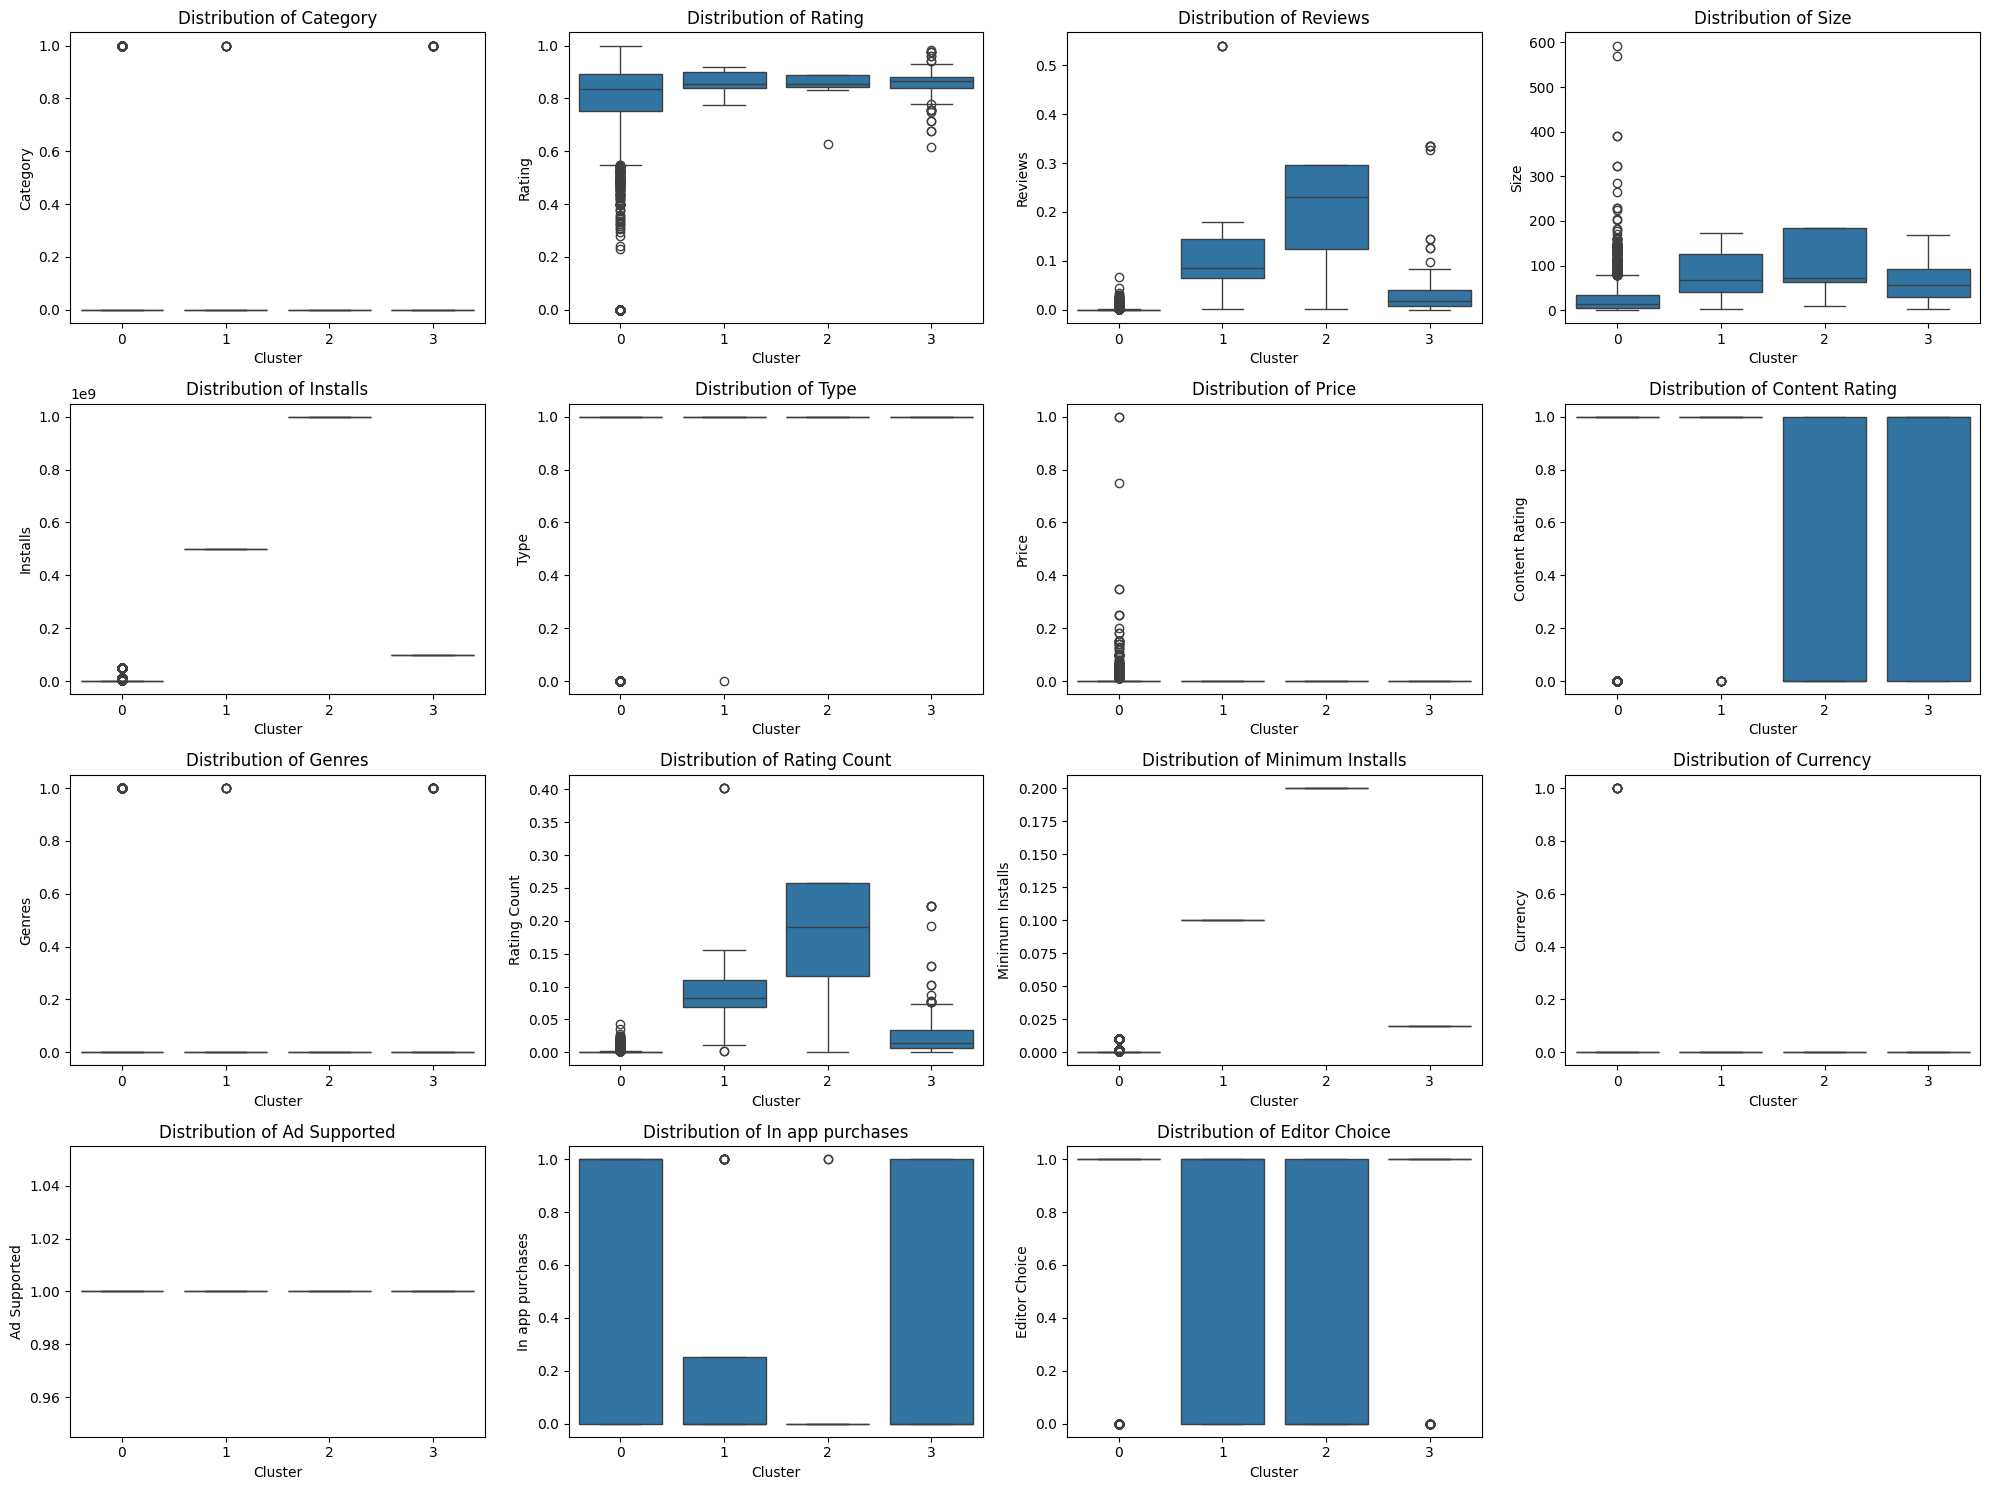

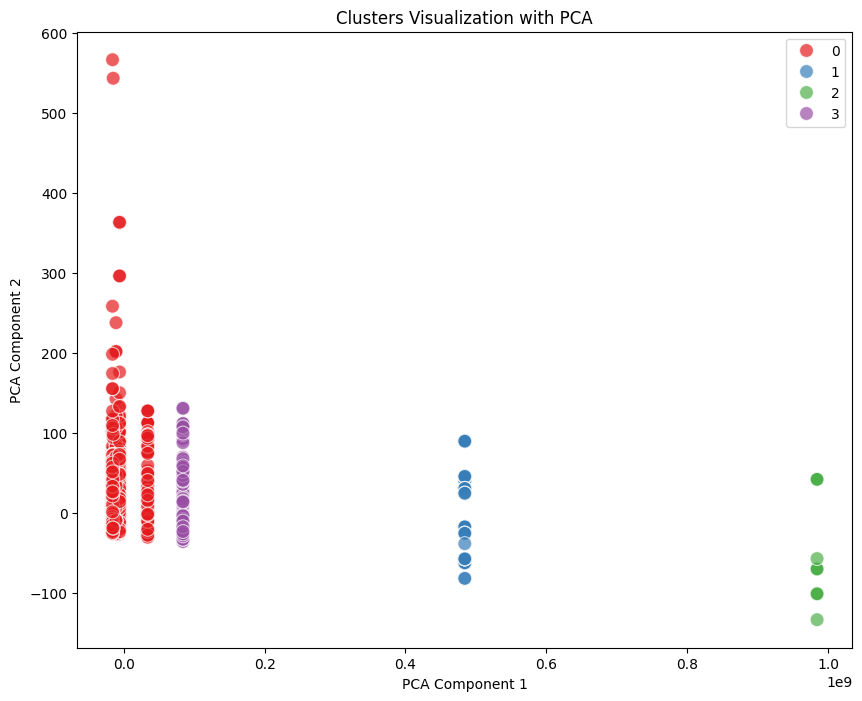

In [ ]:
# Step 3: Cluster the data using the optimal number of clusters
print('Testing with optimal k from elbow method -> k = 4')
kmeans = KMeans(n_clusters=4, random_state=42)
clean_data['Cluster'] = kmeans.fit_predict(clean_data)

# Step 4: Analyze and visualize the results
# Plot the distribution of each column for each cluster
plt.figure(figsize=(20, 15))
for i, column in enumerate(clean_data.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='Cluster', y=column, data=clean_data)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Plot the clusters (if we can reduce to 2D or 3D using PCA for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clean_data.iloc[:, :-1])
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clean_data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
clean_data = pd.read_csv('clean_dataset.csv')
clean_data = clean_data.dropna()

# **Clustering with Hierarchical**

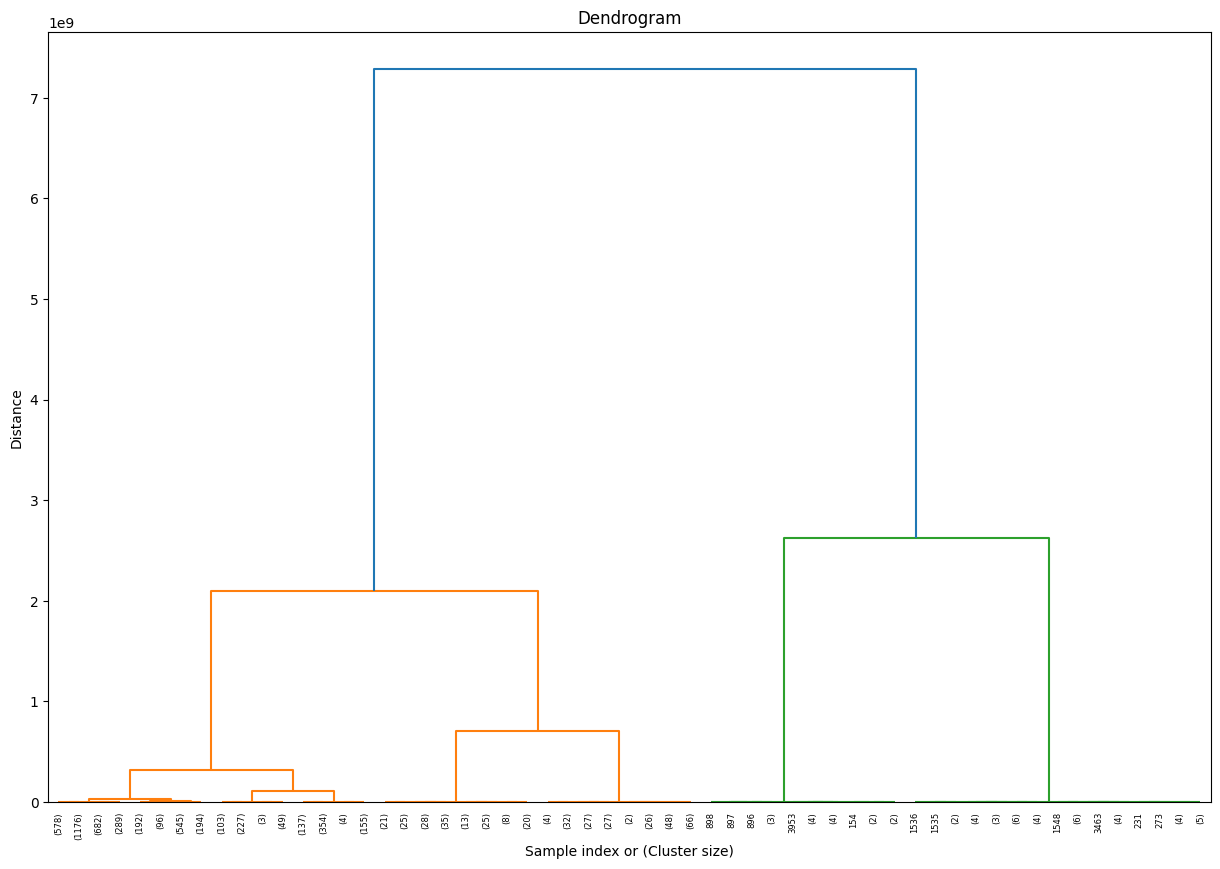

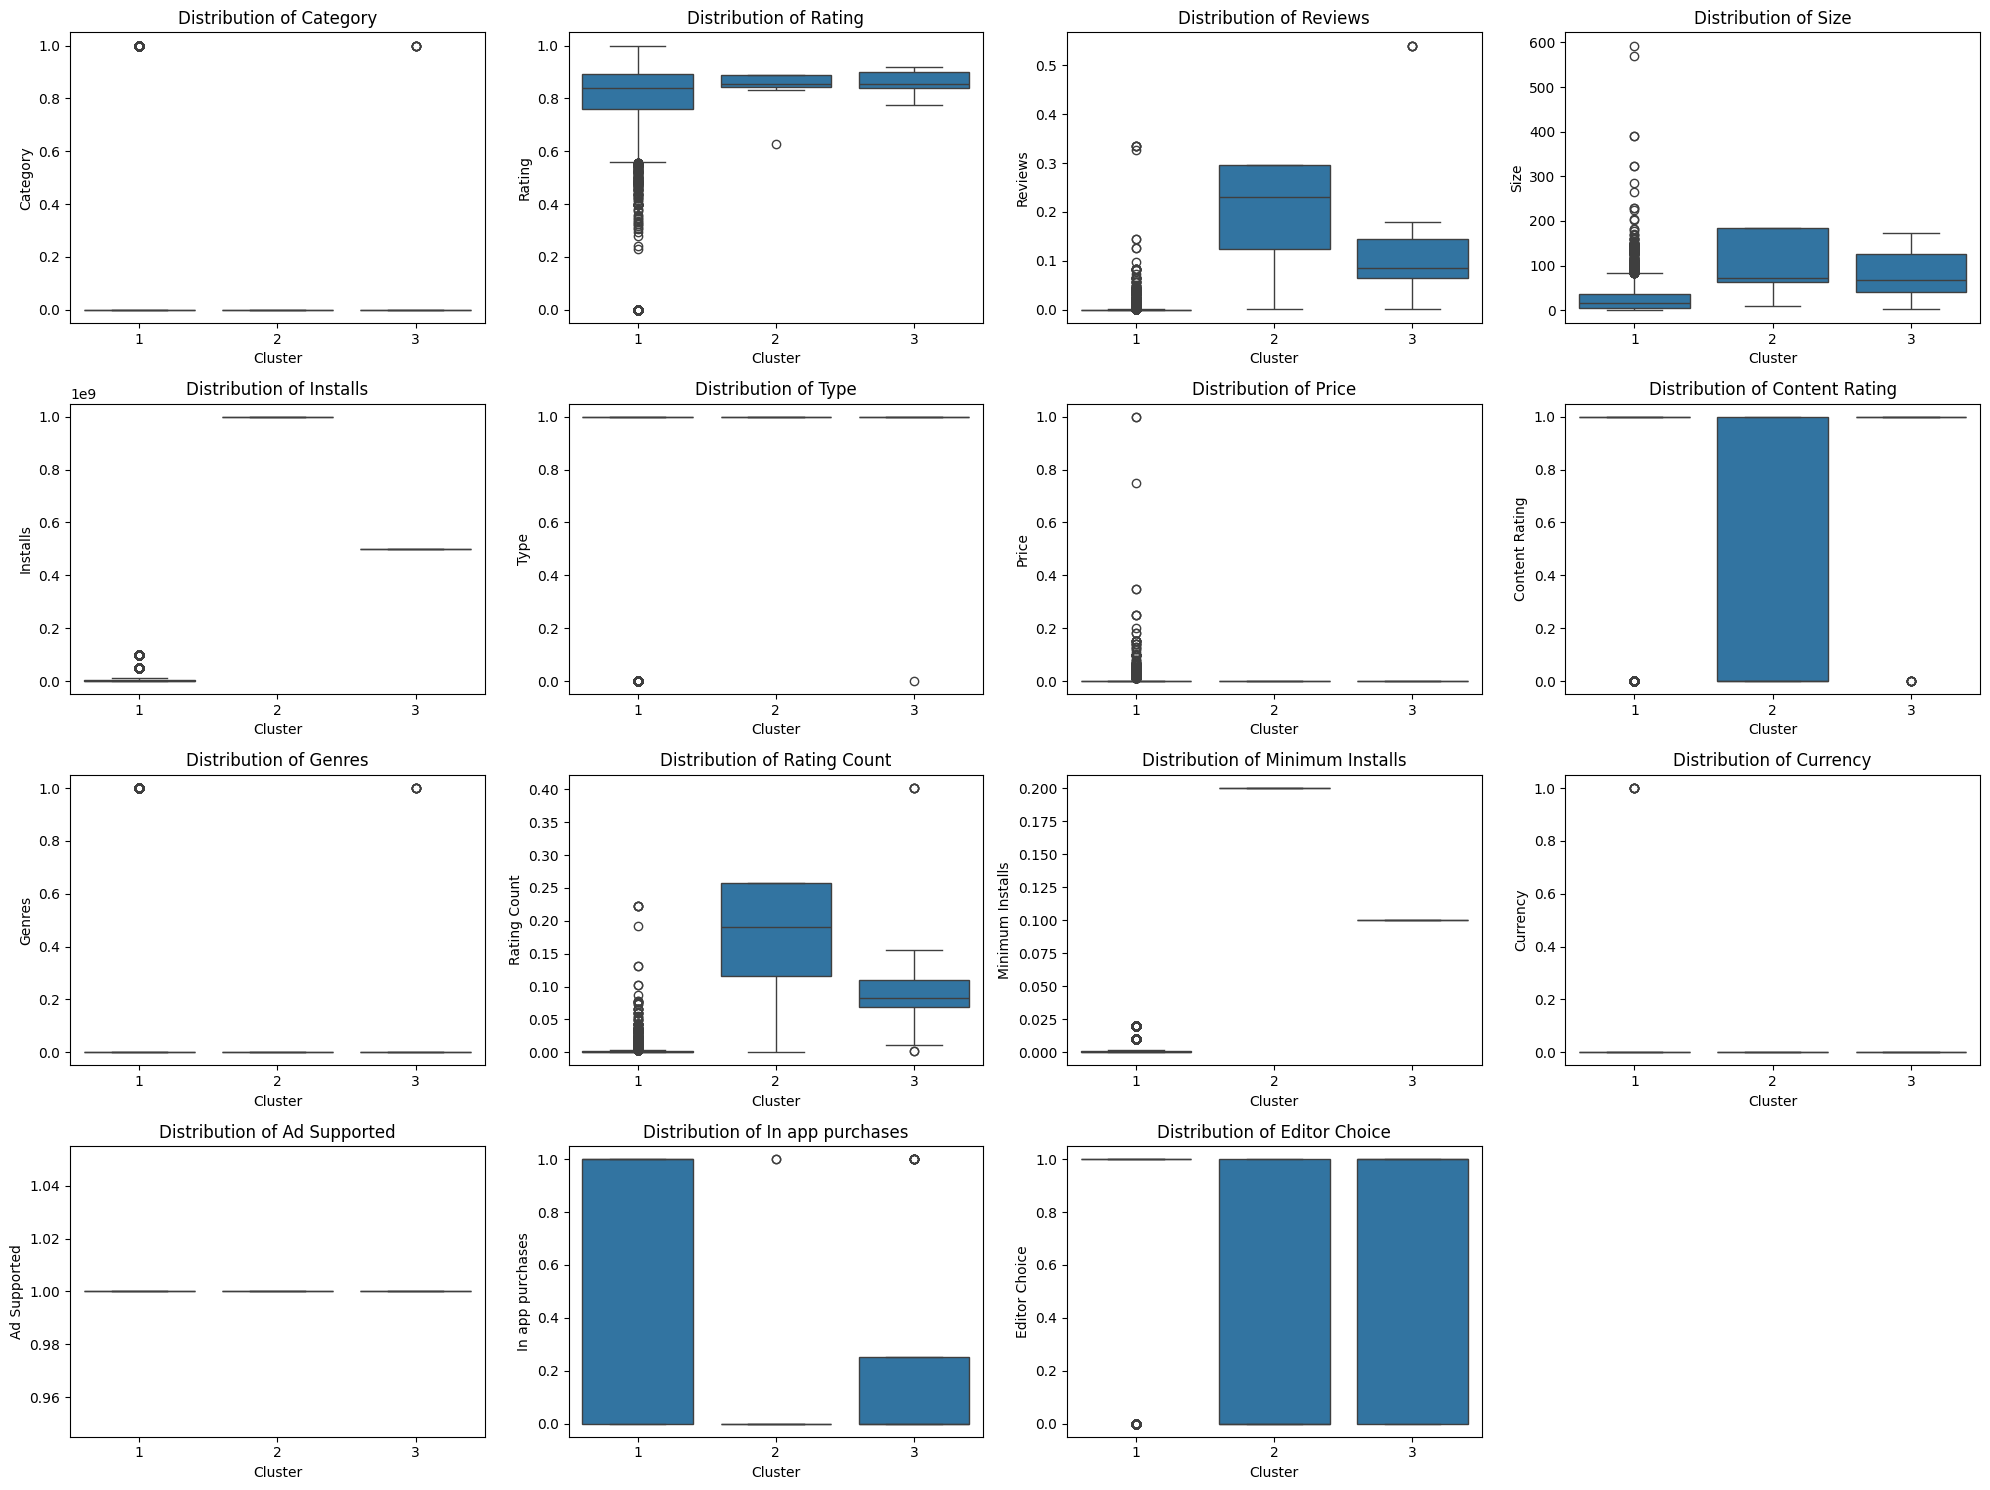

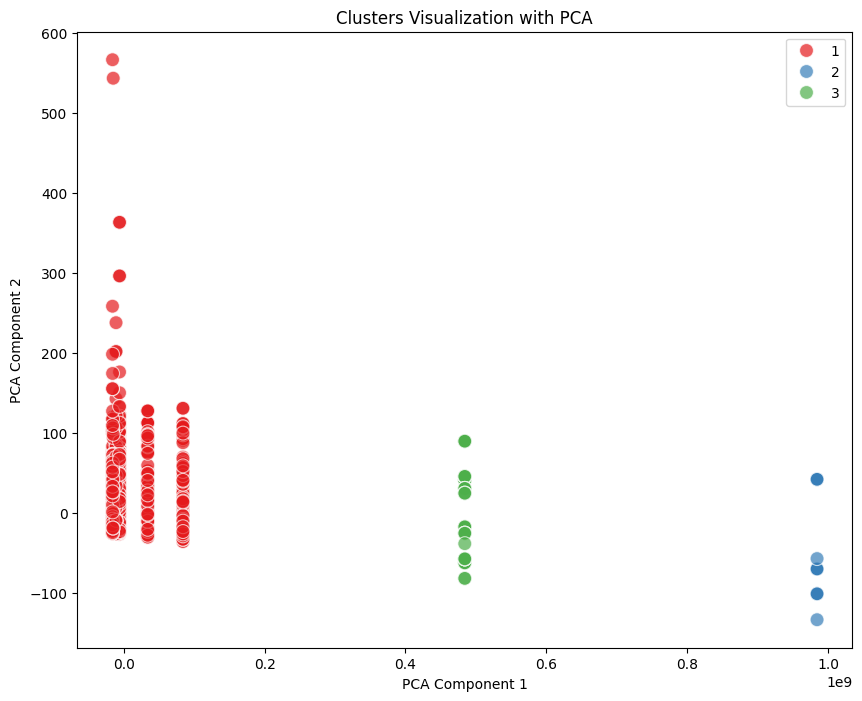

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import seaborn as sns

Z = linkage(clean_data, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()

optimal_k = 3

clean_data['Cluster'] = fcluster(Z, t=optimal_k, criterion='maxclust')

plt.figure(figsize=(20, 15))
for i, column in enumerate(clean_data.columns[:-1]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='Cluster', y=column, data=clean_data)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clean_data.iloc[:, :-1])
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clean_data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
clean_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Rating Count,Minimum Installs,Currency,Ad Supported,In app purchases,Editor Choice,Cluster
0,0.0,0.612613,1.078849e-05,19.0,100000,1.0,0.0,1.0,0.0,8.000234e-06,0.000020,0.0,1.0,1.0,1.0,1
1,0.0,0.808348,1.015852e-03,124.0,10000000,1.0,0.0,1.0,0.0,6.693433e-04,0.002000,0.0,1.0,0.0,1.0,1
2,0.0,0.867990,1.345913e-04,39.0,1000000,1.0,0.0,0.0,0.0,1.197077e-04,0.000200,0.0,1.0,0.0,1.0,1
3,0.0,0.824000,9.873399e-07,30.0,10000,1.0,0.0,0.0,0.0,7.574612e-07,0.000002,0.0,1.0,1.0,1.0,1
4,0.0,0.816611,4.883720e-04,23.0,10000000,1.0,0.0,0.0,0.0,3.617202e-04,0.002000,0.0,1.0,1.0,1.0,1


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5255 entries, 0 to 6249
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          5255 non-null   float64
 1   Rating            5255 non-null   float64
 2   Reviews           5255 non-null   float64
 3   Size              5255 non-null   float64
 4   Installs          5255 non-null   int64  
 5   Type              5255 non-null   float64
 6   Price             5255 non-null   float64
 7   Content Rating    5255 non-null   float64
 8   Genres            5255 non-null   float64
 9   Rating Count      5255 non-null   float64
 10  Minimum Installs  5255 non-null   float64
 11  Currency          5255 non-null   float64
 12  Ad Supported      5255 non-null   float64
 13  In app purchases  5255 non-null   float64
 14  Editor Choice     5255 non-null   float64
 15  Cluster           5255 non-null   int32  
dtypes: float64(14), int32(1), int64(1)
memory usage

# **Classification**

In [ ]:
X = clean_data.drop('Rating', axis=1)
y = clean_data['Rating']

In [ ]:
# Normalize/scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convert target variable to a binary classification problem
y = (y >= 0.5).astype(int)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate classifiers
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Cross-validation to evaluate each model
best_model_name = None
best_model_score = 0
best_model = None

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
    mean_score = scores.mean()
    print(f'{model_name} Mean Cross-Validation Accuracy: {mean_score:.4f}')

    if mean_score > best_model_score:
        best_model_score = mean_score
        best_model_name = model_name
        best_model = model

print(f'\nBest Model: {best_model_name} with Accuracy: {best_model_score:.4f}')

Random Forest Mean Cross-Validation Accuracy: 0.9862
Decision Tree Mean Cross-Validation Accuracy: 0.9788
SVM Mean Cross-Validation Accuracy: 0.8963
Naive Bayes Mean Cross-Validation Accuracy: 0.4622

Best Model: Random Forest with Accuracy: 0.9862


In [ ]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f'\nEvaluation of the Best Model ({best_model_name}):')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Evaluation of the Best Model (Random Forest):
Accuracy: 0.9867
Precision: 0.9850
Recall: 1.0000
F1-score: 0.9925


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 300],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf', 'linear']
    },
    'Naive Bayes': {
        # No parameters to tune for GaussianNB
    }
}

# Train and evaluate classifiers with hyperparameter tuning
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

best_model_name = None
best_model_score = 0
best_model = None
best_params = None

for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name in param_grids and param_grids[model_name]:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        mean_score = grid_search.best_score_
        print(f'{model_name} Best Cross-Validation Accuracy: {mean_score:.4f}')
        print(f'{model_name} Best Parameters: {grid_search.best_params_}')
        if mean_score > best_model_score:
            best_model_score = mean_score
            best_model_name = model_name
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
    else:
        model.fit(X_train, y_train)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        print(f'{model_name} Mean Cross-Validation Accuracy: {mean_score:.4f}')
        if mean_score > best_model_score:
            best_model_score = mean_score
            best_model_name = model_name
            best_model = model
            best_params = None

print(f'\nBest Model: {best_model_name} with Accuracy: {best_model_score:.4f}')
if best_params:
    print(f'Best Parameters: {best_params}')

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nEvaluation of the Best Model ({best_model_name}):')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Training Random Forest...
Random Forest Best Cross-Validation Accuracy: 0.9864
Random Forest Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Training Decision Tree...
Decision Tree Best Cross-Validation Accuracy: 0.9831
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training SVM...
SVM Best Cross-Validation Accuracy: 0.9693
SVM Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Training Naive Bayes...
Naive Bayes Mean Cross-Validation Accuracy: 0.4622

Best Model: Random Forest with Accuracy: 0.9864
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Evaluation of the Best Model (Random Forest):
Accuracy: 0.9867
Precision: 0.9850
Recall: 1.0000
F1-score: 0.9925
